In [1]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/LateNightWithTheDevil/latenight-chart_data-volume-days-pageTypes.csv")

In [3]:
df

,days,03/22/2024,03/23/2024,03/24/2024,03/25/2024,03/26/2024,03/27/2024,03/28/2024,03/29/2024,03/30/2024,...,04/09/2024,04/10/2024,04/11/2024,04/12/2024,04/13/2024,04/14/2024,04/15/2024,04/16/2024,04/17/2024,04/18/2024
0,Online News,351,107,621,367,132,139,78,137,147,...,21,58,60,29,117,28,39,37,38,65
1,QQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,YouTube,0,1,1,0,2,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
3,Broadcast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Facebook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Legacy Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Tumblr,34,15,17,11,10,12,9,15,13,...,13,11,9,10,11,6,9,9,4,13
7,Instagram,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,LinkedIn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Blogs,15,7,19,13,9,6,4,14,5,...,3,4,5,5,1,1,1,3,2,2


In [4]:
engagement = df.copy()

In [5]:
#Transpose Matrix
engagement = engagement.transpose()

In [6]:
#Creating df for Regression Analysis
reg_engagement = df.transpose().copy()

In [7]:
#Calculate Sum of engagements from each source
row_sums = engagement.sum(axis=1)

# Add row sums as a new column
engagement['total'] = row_sums
#engagement['total'] = engagement.iloc[:,6] #Only Forums

#Drop first Row containing all sources
engagement = engagement.drop(engagement.index[0])

#Drop all columns except the 'total' column
columns_to_keep = [engagement.columns[-1]]
engagement = engagement[columns_to_keep]

engagement.index.name = 'date'
engagement.index = pd.to_datetime(engagement.index)

In [8]:
engagement

,total
date,
2024-03-22,6522
2024-03-23,2388
2024-03-24,1979
2024-03-25,3305
2024-03-26,1025
2024-03-27,637
2024-03-28,372
2024-03-29,563
2024-03-30,614


In [9]:
bo = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/LateNightWithTheDevil/latenight-bo.csv")

In [10]:
bo = bo.dropna(axis=1)

In [11]:
bo

,date,revenue,to_date
0,03/22/2024,"$1,159,058","$1,159,058"
1,03/23/2024,"$1,015,434","$2,174,492"
2,03/24/2024,"$660,375","$2,834,867"
3,03/25/2024,"$308,902","$3,143,769"
4,03/26/2024,"$351,501","$3,495,270"
5,03/27/2024,"$305,921","$3,801,191"
6,03/28/2024,"$287,567","$4,088,758"
7,03/29/2024,"$776,474","$4,865,232"
8,03/30/2024,"$871,776","$5,737,008"
9,03/31/2024,"$513,852","$6,250,860"


In [12]:
#Fixing 'date' column
#bo['date'] = pd.to_datetime(bo['date'] + '-2021', format='%b-%d-%Y')

#bo['date'] = bo['date'].dt.strftime('%m/%d/%Y')

# Making 'date' the index of the DataFrame
bo.set_index('date', inplace=True)

#Remove $ value
bo['revenue'] = bo['revenue'].str.replace('$', '')
bo['revenue'] = bo['revenue'].str.replace(',', '')

In [13]:
bo

,revenue,to_date
date,,
03/22/2024,1159058,"$1,159,058"
03/23/2024,1015434,"$2,174,492"
03/24/2024,660375,"$2,834,867"
03/25/2024,308902,"$3,143,769"
03/26/2024,351501,"$3,495,270"
03/27/2024,305921,"$3,801,191"
03/28/2024,287567,"$4,088,758"
03/29/2024,776474,"$4,865,232"
03/30/2024,871776,"$5,737,008"


In [14]:
engagement['total'] = pd.to_numeric(engagement['total'], errors='coerce')
bo['revenue'] = pd.to_numeric(bo['revenue'], errors='coerce')

In [15]:
engagement_ts = engagement.copy()
bo_ts = bo.copy()

In [16]:
engagement_ts

,total
date,
2024-03-22,6522
2024-03-23,2388
2024-03-24,1979
2024-03-25,3305
2024-03-26,1025
2024-03-27,637
2024-03-28,372
2024-03-29,563
2024-03-30,614


In [17]:
bo_ts

,revenue,to_date
date,,
03/22/2024,1159058,"$1,159,058"
03/23/2024,1015434,"$2,174,492"
03/24/2024,660375,"$2,834,867"
03/25/2024,308902,"$3,143,769"
03/26/2024,351501,"$3,495,270"
03/27/2024,305921,"$3,801,191"
03/28/2024,287567,"$4,088,758"
03/29/2024,776474,"$4,865,232"
03/30/2024,871776,"$5,737,008"


In [18]:
# Combine your datasets into a single DataFrame 
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

In [19]:
combined_df

,total,revenue
date,,
2024-03-22,6522,1159058
2024-03-23,2388,1015434
2024-03-24,1979,660375
2024-03-25,3305,308902
2024-03-26,1025,351501
2024-03-27,637,305921
2024-03-28,372,287567
2024-03-29,563,776474
2024-03-30,614,871776


In [20]:
#Making Data Stationary

#Differencing
#engagement_ts['total'] = engagement_ts['total'].diff()
#bo_ts['revenue'] = bo_ts['revenue'].diff()


#Taking Logarithm
#engagement_ts['total'] = np.log(engagement_ts['total'])
#bo_ts['revenue'] = bo_ts['revenue'].replace(-np.inf, np.nan)

# Dropping NA values after making it stationary
#engagement_ts.dropna(inplace=True)
#bo_ts.dropna(inplace=True)

In [21]:
#Checking Stationarity
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Example usage
check_stationarity(engagement_ts['total'])
check_stationarity(bo_ts['revenue'])

ADF Statistic: -7.172807
p-value: 0.000000
Critical Values:
	1%: -3.700
	5%: -2.976
	10%: -2.628
ADF Statistic: -5.406724
p-value: 0.000003
Critical Values:
	1%: -3.859
	5%: -3.042
	10%: -2.661


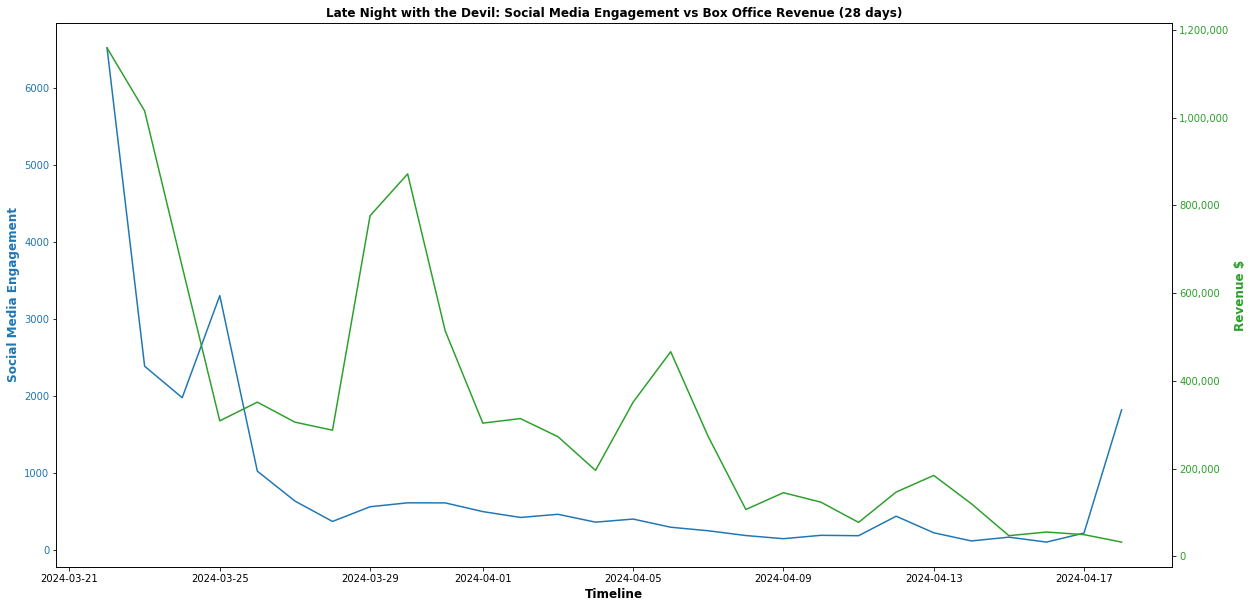

In [23]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:blue'
ax1.set_xlabel('Timeline',fontsize=12,fontweight='bold')
ax1.set_ylabel('Social Media Engagement',color=color,fontsize=12,fontweight='bold')
ax1.plot(combined_df.index,combined_df['total'],color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Revenue $',color=color,fontsize=12,fontweight='bold')
ax2.plot(combined_df.index, combined_df['revenue'],color=color)
ax2.tick_params(axis='y',labelcolor=color)

y_labels = ['{:,.0f}'.format(y) for y in plt.gca().get_yticks()]
plt.gca().set_yticklabels(y_labels)
plt.title('Late Night with the Devil: Social Media Engagement vs Box Office Revenue (28 days)',fontsize=12,fontweight='bold')

plt.grid(False)
plt.show()

In [23]:
correlation, _ = pearsonr(combined_df['total'], combined_df['revenue'])

In [24]:
print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: 0.641536525045762


Maximum Pearson correlation coefficient: 0.6415365250457622
Lag associated with Maximum Pearson correlation coefficient: 0


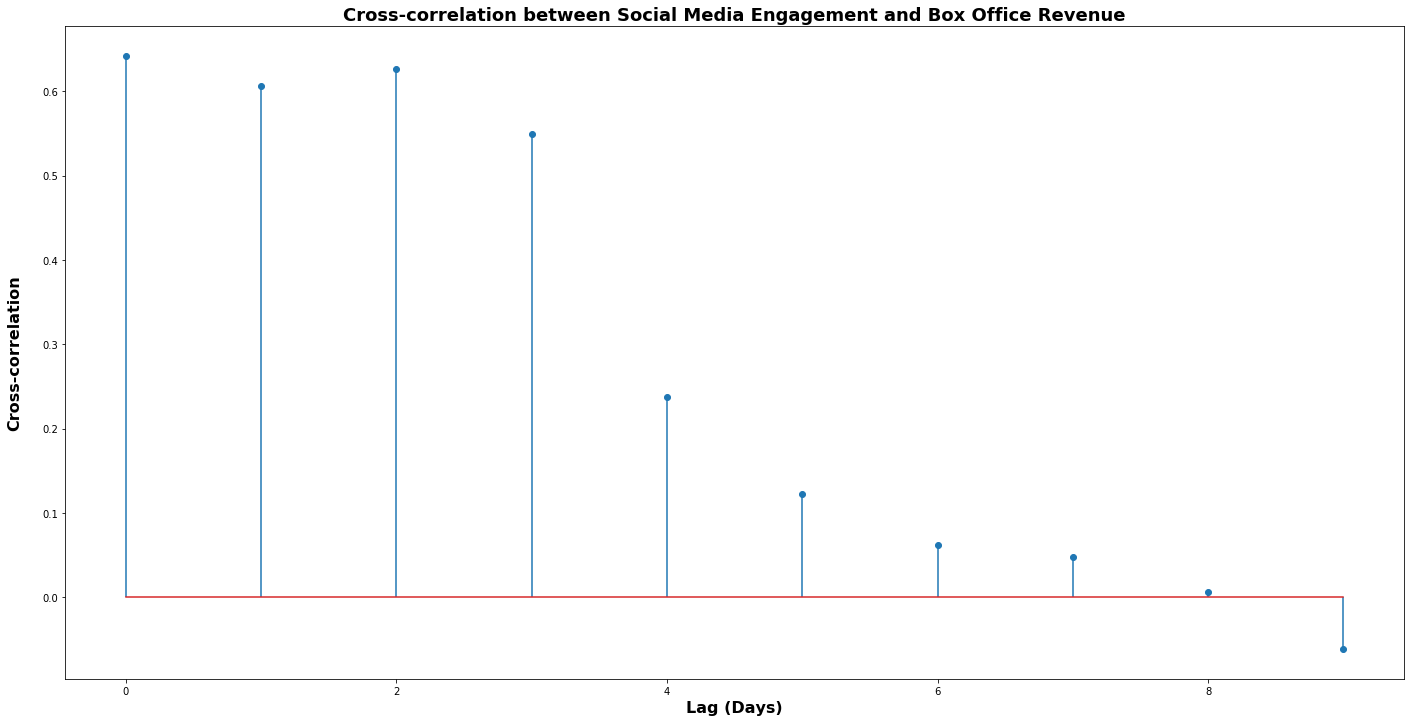

In [25]:
def cross_correlation(series1, series2, lag=0):
    return series1.corr(series2.shift(lag))

# Example usage:
lags = range(0, 10)  # Example lag values from 0 to 12
cross_corr_values = {}
for lag in lags:
    cross_corr_values[lag] = cross_correlation(combined_df['total'], combined_df['revenue'], lag)


max_pair = max(cross_corr_values.items(), key=lambda x: x[1])

#print(cross_corr_values.values())
#cross_corr_values = [cross_correlation(combined_df['total'], combined_df['revenue'], lag) for lag in lags]

print(f'Maximum Pearson correlation coefficient: {max_pair[1]}')
print(f'Lag associated with Maximum Pearson correlation coefficient: {max_pair[0]}')
# Plotting the cross-correlation values
import matplotlib
#matplotlib.use('TkAgg')  # Use TkAgg backend
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
plt.stem(lags, cross_corr_values.values(), use_line_collection=True)
plt.xlabel('Lag (Days)',fontsize=16,fontweight='bold')
plt.ylabel('Cross-correlation',fontsize=16,fontweight='bold',labelpad=20)
plt.title('Cross-correlation between Social Media Engagement and Box Office Revenue',fontsize=18,fontweight='bold')
plt.show()

In [27]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Combine your datasets into a single DataFrame for the Granger causality test
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

# Perform the Granger causality test
# The maxlag parameter is the maximum lag to test for, and the test 'ssr_chi2test' is one of the possible tests
granger_test_results = grangercausalitytests(combined_df, maxlag=8, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7152  , p=0.2027  , df_denom=24, df_num=1
ssr based chi2 test:   chi2=1.9296  , p=0.1648  , df=1
likelihood ratio test: chi2=1.8637  , p=0.1722  , df=1
parameter F test:         F=1.7152  , p=0.2027  , df_denom=24, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8220  , p=0.4532  , df_denom=21, df_num=2
ssr based chi2 test:   chi2=2.0354  , p=0.3614  , df=2
likelihood ratio test: chi2=1.9597  , p=0.3754  , df=2
parameter F test:         F=0.8220  , p=0.4532  , df_denom=21, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0689  , p=0.9758  , df_denom=18, df_num=3
ssr based chi2 test:   chi2=0.2869  , p=0.9625  , df=3
likelihood ratio test: chi2=0.2852  , p=0.9628  , df=3
parameter F test:         F=0.0689  , p=0.9758  , df_denom=18, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0838  , p=0.9862  , df_d

In [28]:
#Linear Regression Fit
reg_engagement

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
days,Online News,QQ,YouTube,Broadcast,Facebook,Legacy Instagram,Tumblr,Instagram,LinkedIn,Blogs,Forums,Facebook Public,X,VK,Review,Reddit,4Chan
03/22/2024,351,0,0,0,0,0,34,0,0,15,53,10,4805,0,5,1249,0
03/23/2024,107,0,1,0,0,0,15,0,0,7,44,4,1771,0,3,436,0
03/24/2024,621,0,1,0,0,0,17,0,0,19,35,4,848,0,4,430,0
03/25/2024,367,0,0,0,0,0,11,0,0,13,26,4,2579,0,2,303,0
03/26/2024,132,0,2,0,0,0,10,0,0,9,9,7,697,0,2,157,0
03/27/2024,139,0,0,0,0,0,12,0,0,6,6,3,367,0,2,102,0
03/28/2024,78,0,0,0,0,0,9,0,0,4,12,2,188,0,1,78,0
03/29/2024,137,0,0,0,0,0,15,1,0,14,23,2,253,0,4,114,0
03/30/2024,147,0,0,0,0,0,13,0,0,5,16,2,317,0,3,111,0


In [29]:
#Make first row as Columns
reg_engagement.columns = reg_engagement.iloc[0]

In [30]:
#Drop first row
reg_engagement = reg_engagement.drop(reg_engagement.index[0])

In [31]:
#Drop Columns (Content Sources where all values are 0)
reg_engagement = reg_engagement.loc[:, (reg_engagement != 0).any(axis=0)]

In [32]:
reg_engagement = reg_engagement.rename(columns={'days': 'date'})

In [33]:
reg_engagement

days,Online News,YouTube,Tumblr,Instagram,Blogs,Forums,Facebook Public,X,Review,Reddit
03/22/2024,351,0,34,0,15,53,10,4805,5,1249
03/23/2024,107,1,15,0,7,44,4,1771,3,436
03/24/2024,621,1,17,0,19,35,4,848,4,430
03/25/2024,367,0,11,0,13,26,4,2579,2,303
03/26/2024,132,2,10,0,9,9,7,697,2,157
03/27/2024,139,0,12,0,6,6,3,367,2,102
03/28/2024,78,0,9,0,4,12,2,188,1,78
03/29/2024,137,0,15,1,14,23,2,253,4,114
03/30/2024,147,0,13,0,5,16,2,317,3,111
03/31/2024,169,0,14,0,3,10,1,254,1,161


In [34]:
shift = -2 #Based on Lag

In [34]:
bo_series = bo['revenue']

In [35]:
bo_series

date
03/22/2024    1159058
03/23/2024    1015434
03/24/2024     660375
03/25/2024     308902
03/26/2024     351501
03/27/2024     305921
03/28/2024     287567
03/29/2024     776474
03/30/2024     871776
03/31/2024     513852
04/01/2024     303710
04/02/2024     314028
04/03/2024     272713
04/04/2024     195940
04/05/2024     351442
04/06/2024     466445
04/07/2024     272862
04/08/2024     106732
04/09/2024     145128
04/10/2024     123431
04/11/2024      77397
04/12/2024     146558
04/13/2024     184448
04/14/2024     120056
04/15/2024      47146
04/16/2024      55363
04/17/2024      49461
04/18/2024      32488
Name: revenue, dtype: int64

In [37]:
bo_series_shifted = bo_series.shift(shift)

In [38]:
bo_series_shifted = bo_series_shifted[:shift]

In [39]:
bo_series_shifted

date
07/07/2023    7738137.0
07/08/2023    3507174.0
07/09/2023    3486701.0
07/10/2023    2547367.0
07/11/2023    2531276.0
                ...    
09/08/2023       3051.0
09/09/2023       1155.0
09/10/2023       1064.0
09/11/2023       1234.0
09/12/2023        649.0
Name: revenue, Length: 68, dtype: float64

In [40]:
reg_engagement = reg_engagement.iloc[:shift, :]

In [41]:
reg_engagement

days,Online News,YouTube,Facebook,Tumblr,Blogs,Forums,Facebook Public,Twitter,Review,Reddit
07/07/23,226,1,0,9,22,6,1,152,2,54
07/08/23,212,2,0,13,9,23,2,77,0,43
07/09/23,686,2,0,28,12,26,6,108,2,53
07/10/23,313,1,0,14,19,22,3,110,0,38
07/11/23,70,1,0,17,8,8,0,41,0,52
...,...,...,...,...,...,...,...,...,...,...
09/08/23,8,0,0,13,0,1,0,12,0,2
09/09/23,12,0,0,21,1,2,0,6,0,7
09/10/23,11,0,0,14,3,2,0,8,1,2
09/11/23,8,0,0,25,1,1,0,18,0,2


In [36]:
reg_engagement = reg_engagement.astype(int)

In [37]:
reg_engagement

days,Online News,YouTube,Tumblr,Instagram,Blogs,Forums,Facebook Public,X,Review,Reddit
03/22/2024,351,0,34,0,15,53,10,4805,5,1249
03/23/2024,107,1,15,0,7,44,4,1771,3,436
03/24/2024,621,1,17,0,19,35,4,848,4,430
03/25/2024,367,0,11,0,13,26,4,2579,2,303
03/26/2024,132,2,10,0,9,9,7,697,2,157
03/27/2024,139,0,12,0,6,6,3,367,2,102
03/28/2024,78,0,9,0,4,12,2,188,1,78
03/29/2024,137,0,15,1,14,23,2,253,4,114
03/30/2024,147,0,13,0,5,16,2,317,3,111
03/31/2024,169,0,14,0,3,10,1,254,1,161


In [44]:
bo_series_shifted

date
07/07/2023    7738137.0
07/08/2023    3507174.0
07/09/2023    3486701.0
07/10/2023    2547367.0
07/11/2023    2531276.0
                ...    
09/08/2023       3051.0
09/09/2023       1155.0
09/10/2023       1064.0
09/11/2023       1234.0
09/12/2023        649.0
Name: revenue, Length: 68, dtype: float64

In [38]:
# Prepare the features (X) and the target (y)
X = reg_engagement  # 'Reg Engagement' df as features
y = bo_series  # 'Revenue' series

# Reset index if necessary
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the model (for the intercept)
X_scaled_with_const = sm.add_constant(X_scaled)

# Fit the OLS model
model = sm.OLS(y, X_scaled_with_const).fit()

# Get the regression report
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     7.788
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           0.000134
Time:                        17:38:58   Log-Likelihood:                -368.39
No. Observations:                  28   AIC:                             758.8
Df Residuals:                      17   BIC:                             773.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.399e+05   3.04e+04     

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
# Extract the coefficients (excluding the intercept) and sort them by their absolute values
coefficients = model.params.drop('const').abs().sort_values(ascending=False)

# Print the sorted coefficients to identify the top contributing features
print("\nTop Contributing Features:")
print(coefficients)


Top Contributing Features:
Forums             238646.955672
X                  154419.861146
Reddit             104608.784599
Review              90449.917551
Online News         73749.339773
Blogs               52695.261015
YouTube             28268.951732
Instagram           16714.435994
Tumblr               8338.216366
Facebook Public      1574.076943
dtype: float64
